## Lab Assignment
#### Ezhilarasi Muthukuamr - DSAI - M1 - Machine Learning

# Question:

1. **Understand** the different algorithms: Kmeans, Kmedoids, DBSCAN, Hierarchical clustering
2. **Clusterize the test part of the MNIST dataset** with the sklearn version of the previous algorithms
    * Use the following code to prepare the dataset
    ```
    from sklearn.datasets import fetch_openml
    from sklearn.model_selection import train_test_split

    mnist = fetch_openml(“mnist_784”, version=1)
    X = mnist.data
    y = mnist.target.astype(int)

    X_train, X_test, y_train, y_test = train_test_split(
           X, y, test_size=10000, stratify=y, random_state=0
        )

    # Use X_test and eventually y_test
    ```
3. **Submit** a notebook written using Markdown cells before the exam date
    * Consider pre-processing. Of course, You can **reduce the number of features** used with one of the methods seen in class (or if it has not been seen, you must describe it).
    * You do **not know the number of clusters** and therefore we do not know the labels
    * All choices made must be justified
    * The code must be explained
    * The results must be compared - for evaluation purpose only, you can use the true labels
    


# Answer

## Part - 1. Understanding different Clustering Algorithms and different metrics

Using synthetis datasets, explored the functionalities of different algorithms and metrics, plotted different values to understand the results.

## Part -2. Solution Exploration for MNIST test dataset

Applied the studied algorithms on MNIST Test dataset and compared the result to decide on the best algorithm.

## Working Understanding Notes


#### K-Means
- Finds centriod based on mean.
- Needs K upfront; good when clusters are approximately similar size.
- Sensitive to outliers.
- Practical complexity ~ O(n * K * iterations).

#### K-Medoids
- Like K-Means but center is an actual point (medoid).
- Robust to outliers; can use arbitrary distance metrics.
- Naive complexity ~ O(n^2); heavy for full 10k test set.

#### DBSCAN
- Parameters: eps, min_sample.
- Finds arbitrary shapes; labels sparse points as noise.
- Great when K unknown; struggles with varying densities.
- High dimensional data → need PCA first to make eps meaningful.

#### Hierarchical (agglomerative)
- Bottom-up merges using linkage criteria.
- Linkages: single (chaining), complete (compact), average (balanced), Ward (variance minimization). I will use Ward.
- Dendrogram cut gives pseudo model selection.
- Full MNIST expensive (O(n^2));


In [1]:
import numpy as np

#### Finding Centroid

In [2]:
# Synthetic input
points = [[1, 2], [2, 3], [1, 3]]

# Centroid
centroid = np.mean(points, axis=0)

print(f"centroid: [{centroid[0]:.3f}, {centroid[1]:.3f}]")

centroid: [1.333, 2.667]


#### Finding Medoid

In [3]:
# Synthetic input with one outlier at last
points = [[1, 2], [2, 3], [1, 3], [100, 100]] 

# Centroid
centroid = np.mean(points, axis=0)
print(f"Centroid: [{centroid[0]:.3f}, {centroid[1]:.3f}]")

# Medoid using norm(distance)
distances = [sum(np.linalg.norm(np.array(p) - np.array(q)) for q in points) for p in points]

print(f"Distance list: {distances}")
print(f"Min distance: {np.argmin(distances)}")

medoid = points[np.argmin(distances)]
print(f"Medoid: {medoid}")

Centroid: [26.000, 27.000]
Distance list: [np.float64(141.716044131824), np.float64(140.30184897614035), np.float64(140.6001443000692), np.float64(415.78961028328735)]
Min distance: 1
Medoid: [2, 3]


#### Using Inertia for clustering

In [4]:
#Inertia

# Synt. data with 3 clusters
X_sample = np.array([[1, 2], [2, 3], [1, 3],          
              [8, 8], [9, 9], [8, 9],          
              [15, 2], [16, 3], [15, 3]])      

labels = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])

# numpy conversion
centroid_python_list = [np.mean(X_sample[labels == k], axis=0) for k in range(2)]
centroid_np_arrray = np.array(centroid_python_list)

# Computing centroid
centroids = np.array([np.mean(X_sample[labels == k], axis=0) for k in range(3)])

print(f"Centroids: {centroids}")

def calculate_inertia(X_sample, labels, centroids):
    inertia = 0
    for k in range(len(centroids)):
        cluster_points = X_sample[labels == k]
        distances = np.sum((cluster_points - centroids[k])**2)
        inertia += distances
    return inertia

inertia = calculate_inertia(X_sample, labels, centroids)

print(f"inertia: {inertia}")

def type_by_interia(interia):
    # Evaluate clustering quality: thresholds vary by data scale/size (e.g., 9 points in 2D: <10=good, 10-50=moderate, >50=poor)
    # Lower inertia = tighter clusters (points closer to centroids)
    if inertia < 10:
        print("clustering - Very Good - Points very close to centroids")
    elif inertia < 50:
        print("clustering - Good - reasonably close")
    elif inertia < 100:
        print("clustering - Avg - not bad")
    else:
        print("clustering - Bad - Points are far")

type_by_interia(inertia)

Centroids: [[ 1.33333333  2.66666667]
 [ 8.33333333  8.66666667]
 [15.33333333  2.66666667]]
inertia: 4.0
clustering - Very Good - Points very close to centroids


#### Clustering using Silhouette Score

In [5]:
#Silhouette Score
from sklearn.metrics import silhouette_score

# Calculate silhouette score
sil_score = silhouette_score(X_sample, labels)
print(f"Silhouette score: {sil_score:.3f}")

if sil_score == 0:
    print(f"Points found on the boundary")
elif sil_score > 0 and sil_score < 1:
    print(f"good clustering")
elif sil_score > -1 and sil_score < 0:
    print(f"wrong clustering")

Silhouette score: 0.875
good clustering


#### Finding 2 points are in cluster or not using euclidian, Manhattan distance

In [6]:
#Euclidean distance

def euclidean_distance(p, q):
    return np.sqrt(np.sum((p - q)**2))

p = X_sample[0]
q = X_sample[8]
print(f"point p {p}")
print(f"point q {q}")

distance = euclidean_distance(p, q)
print(f"Ecludian distance: {distance:.3f}")

if distance < 2:
    print("same cluster")
elif distance < 5:
    print("belong to clusters near to each other")
elif distance < 10:
    print("points can be from different clusters")
else:
    print("surely different clusters")

point p [1 2]
point q [15  3]
Ecludian distance: 14.036
surely different clusters


In [7]:
# Manhattan Distance

p = X_sample[0]
q = X_sample[8]
print(f"point p {p}")
print(f"point q {q}")

def manhattan_dist(p, q):
    return np.sum(np.abs(p - q))

distance = manhattan_dist(p, q)
print(f"Manhattan distance between point p and q: {distance:.3f}")

if distance < 2:
    print("very close")
elif distance < 5:
    print("nearby clusters")
elif distance < 10:
    print("different clusters")
else:
    print("definitely different cluster")

point p [1 2]
point q [15  3]
Manhattan distance between point p and q: 15.000
definitely different cluster


#### Finding Direction

In [8]:
#Cosine similarity, measure the alignment of direction between 2 points based on distance value.

from sklearn.metrics.pairwise import cosine_similarity

p = np.array([[2, 3]])
q = np.array([[-40, 37]])

similarity = cosine_similarity(p, q)[0, 0]
distance = 1 - similarity
print(f"Cosine similarity {similarity} and the distance is {distance:.3f}")

if distance < 0.1:
    print("same direction")
elif distance < 0.3:
    print("similar direction")
elif distance < 0.7:
    print("different directions")
else:
    print("opposite directions")

Cosine similarity 0.15779197748512186 and the distance is 0.842
opposite directions


#### Comparing Ecludian & Manhattan distance

ecu_distance 5.0
man_distance: 7


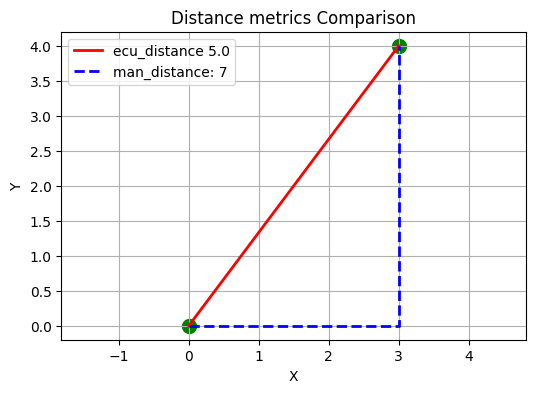

In [9]:
# Comparing the distance mesured by ecludian and Manhattan distances


import matplotlib.pyplot as plt

# Two points
p = np.array([0, 0])
q = np.array([3, 4])

ecu_distance = euclidean_distance(p, q)
man_distance = manhattan_dist(p, q)

print(f"ecu_distance {ecu_distance}")
print(f"man_distance: {man_distance}")

plt.figure(figsize=(6, 4))
plt.plot([0, 3], [0, 4], 'r-', linewidth=2, label=f"ecu_distance {ecu_distance}")
plt.plot([0, 3, 3], [0, 0, 4], 'b--', linewidth=2, label=f"man_distance: {man_distance}")
plt.scatter([0, 3], [0, 4], s=100, c='green')
plt.grid(True)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Distance metrics Comparison')
plt.axis('equal')
plt.show()




#### DBSCAN

In [10]:
#DBSCAN Density based spatial clustering of application with noise

from sklearn.cluster import DBSCAN

X = np.array([[1, 2], [1.5, 1.8], [1.2, 2.1], [1.3, 2.2],
              [8, 8], [8.2, 8.3], [7.9, 8.1], [8.1, 7.8],
              [15, 15], [15.1, 15.2], [14.9, 15.1],
              [5, 5], [20, 2], [2, 20]])

dbscan = DBSCAN(eps=0.5, min_samples=3)
dbscan_labels = dbscan.fit_predict(X)

noise = X[dbscan_labels == -1]
print(f"Points in cluster X is {X}")
print(f"Noise: {noise}")

Points in cluster X is [[ 1.   2. ]
 [ 1.5  1.8]
 [ 1.2  2.1]
 [ 1.3  2.2]
 [ 8.   8. ]
 [ 8.2  8.3]
 [ 7.9  8.1]
 [ 8.1  7.8]
 [15.  15. ]
 [15.1 15.2]
 [14.9 15.1]
 [ 5.   5. ]
 [20.   2. ]
 [ 2.  20. ]]
Noise: [[ 5.  5.]
 [20.  2.]
 [ 2. 20.]]


Normalize Feature

In [11]:
#Hierarcy cluster

KMeans experiment using sklearn

#### K-means

kmeans:  KMeans(n_clusters=2, random_state=42)
Centroids: [[1.93216218 1.9639913 ]
 [5.94272827 3.08403723]]
interia: 52.30254948517441
clustering - Very Good - Points very close to centroids


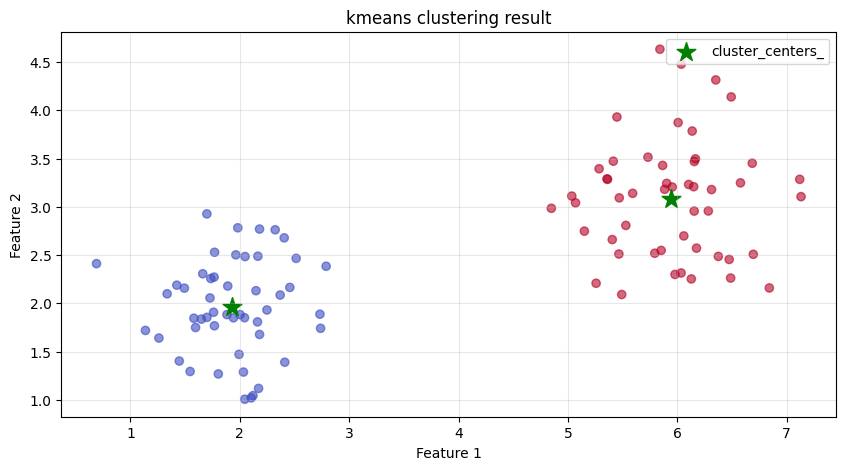

In [12]:
# K-mean example
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(42)
cluster1 = np.random.randn(50, 2) * 0.5 + np.array([2, 2])
cluster2 = np.random.randn(50, 2) * 0.6 + np.array([6, 3])
X = np.vstack([cluster1, cluster2])

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
print(f"kmeans:  {kmeans}")
print(f"Centroids: {kmeans.cluster_centers_}")
print(f"interia: {kmeans.inertia_}")
type_by_interia(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='coolwarm', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
           c='green', marker='*', s=200, edgecolor='green', label='cluster_centers_')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('kmeans clustering result')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

Scaled down, Applied PCA to focus on only 2 components, plot subset for easy understanding

Centroid: [[ 1.19400876 -0.18244293]
 [-1.19400876  0.18244293]]


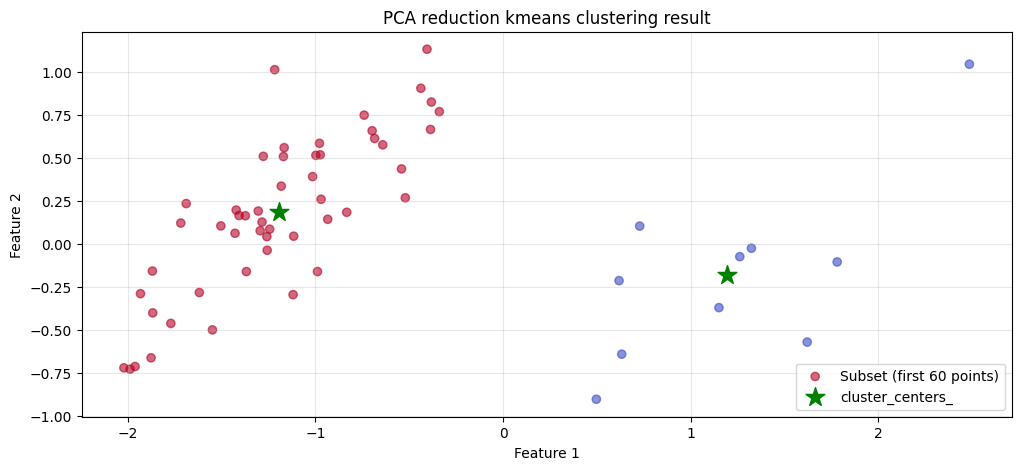

In [13]:
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# Then cluster
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_reduced)
print(f"Centroid: {kmeans.cluster_centers_}")

plt.figure(figsize=(12, 5))

X_subset = X_reduced[:60]
labels_subset = kmeans.labels_[:60]
plt.scatter(X_subset[:, 0], X_subset[:, 1], c=labels_subset, cmap='coolwarm', alpha=0.6, label='Subset (first 60 points)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
           c='green', marker='*', s=200, edgecolor='green', label='cluster_centers_')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('PCA reduction kmeans clustering result')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()


#### K-medoids experiment

In [14]:
# medoid comparision with centroid
from scipy.spatial.distance import cdist
distances = cdist(X_reduced, X_reduced)
total_distances = distances.sum(axis=1)
medoid_idx = np.argmin(total_distances)
medoid = X_reduced[medoid_idx]

print(f"medoid: {medoid}")
print(f"centroid: {kmeans.cluster_centers_}")

medoid: [-0.52065424  0.26723687]
centroid: [[ 1.19400876 -0.18244293]
 [-1.19400876  0.18244293]]


Medoids:
[[-1.28411672  0.12613315]
 [ 1.26156002 -0.0749803 ]]
Centroid:
[[ 1.19400876 -0.18244293]
 [-1.19400876  0.18244293]]


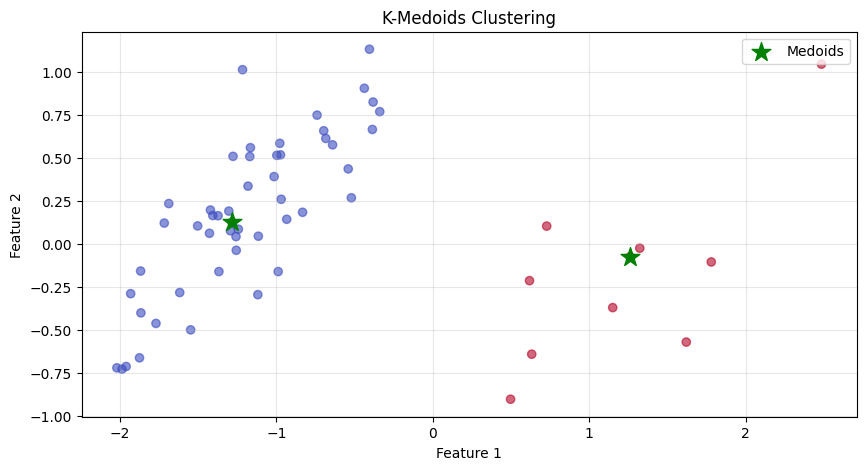

In [15]:
# K-Medoids experiment
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=2, random_state=42)
kmedoids.fit(X_reduced)

print(f"Medoids:\n{kmedoids.cluster_centers_}")
print(f"Centroid:\n{kmeans.cluster_centers_}")


plt.figure(figsize=(10, 5))

X_subset = X_reduced[:60]
labels_subset = kmedoids.labels_[:60]
plt.scatter(X_subset[:, 0], X_subset[:, 1], c=labels_subset, cmap='coolwarm', alpha=0.6)
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], 
           c='green', marker='*', s=200, edgecolor='green', label='Medoids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Medoids Clustering')
plt.legend()
plt.grid(True, alpha=0.3)

#### Density based clustering

For DBSCAN, eps value if too low could fragment more clusters, too high will group all under one big cluster.
min_samples with low value like 2 will make the cluster too small and meaning less, high value sparse or non dense areas would become noise

eps value:  0.2 ; noise :  14 for X: 14 
eps value:  0.9 ; noise :  3 for X : 14 


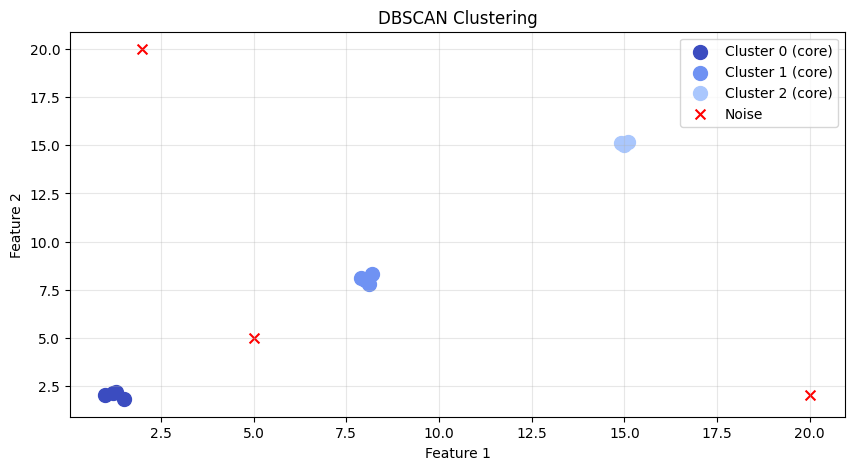

In [16]:
#DBSCAN Density based spatial clustering of application with noise

from sklearn.cluster import DBSCAN

X = np.array([[1, 2], [1.5, 1.8], [1.2, 2.1], [1.3, 2.2],
              [8, 8], [8.2, 8.3], [7.9, 8.1], [8.1, 7.8],
              [15, 15], [15.1, 15.2], [14.9, 15.1],
              [5, 5], [20, 2], [2, 20]])

eps=0.2
dbscan = DBSCAN(eps=eps, min_samples=3)
dbscan_labels = dbscan.fit_predict(X)
noise = X[dbscan_labels == -1]
print(f"eps value:  {eps} ; noise :  {len(noise)} for X: {len(X)} ")

eps=0.9
dbscan = DBSCAN(eps=eps, min_samples=3)
dbscan_labels = dbscan.fit_predict(X)
noise = X[dbscan_labels == -1]
print(f"eps value:  {eps} ; noise :  {len(noise)} for X : {len(X)} ")

plt.figure(figsize=(10, 5))

unique_labels = set(dbscan_labels)
colors = plt.cm.coolwarm(np.linspace(0, 0.5, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        #plot noise separately
        class_member_mask = (dbscan_labels == label)
        plt.scatter(X[class_member_mask, 0], X[class_member_mask, 1],
                   c='red', marker='x', s=50, label='Noise')
    else:
        class_member_mask = (dbscan_labels == label)
        core_mask = np.zeros(len(X), dtype=bool)
        core_mask[dbscan.core_sample_indices_] = True
        
        xy_core = X[class_member_mask & core_mask]
        plt.scatter(xy_core[:, 0], xy_core[:, 1],
                   c=[color], marker='o', s=100, edgecolor=[color],
                   label=f'Cluster {label} (core)')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.legend()
plt.grid(True, alpha=0.3)


#### Hierarchical clustering

Choosing Agglomerative - as it is simple and its complexity O(n^2 log n) is efficient than Divisive which is having exponential complexity

Agglomerative is a bottom-up approach (starts with individual points and merges them), while Divisive is a top-down approach (starts with all points in one cluster and splits them). 

Exploring different linkage methods of Agglomerative to validate effective method

agg_single_labels [0 0 0 0 0 0 2 2 2 1 1 1]
agg_comp_labels [0 0 0 0 0 0 1 1 1 2 2 2]
agg_labels_avg [0 0 0 0 0 0 1 1 1 2 2 2]
labels_ward [0 0 0 0 0 0 1 1 1 2 2 2]


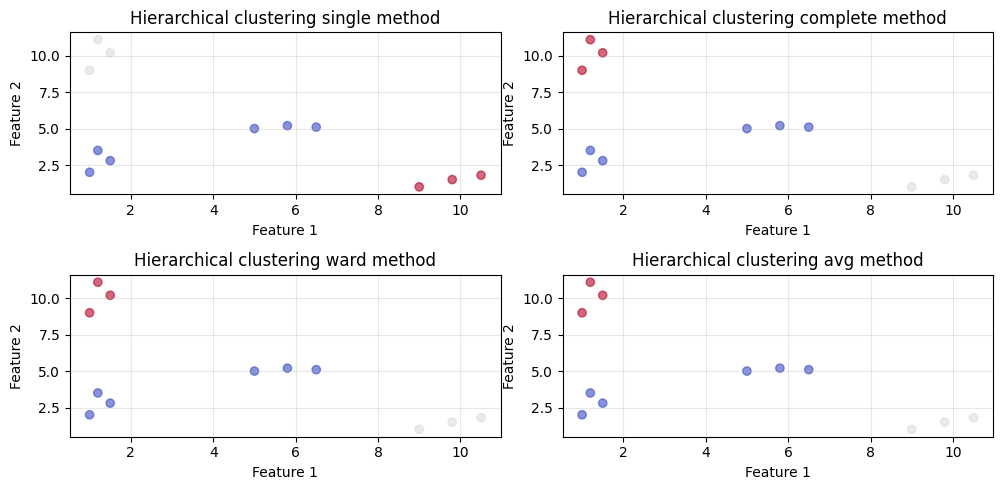

In [17]:
#Hierarchical clustering

from sklearn.cluster import AgglomerativeClustering

X_for_hierarchi = np.array([[1, 2], [1.5, 2.8], [1.2, 3.5],
              [5, 5], [5.8, 5.2], [6.5, 5.1],      
              [9, 1], [9.8, 1.5], [10.5, 1.8],
              [1, 9], [1.5, 10.2], [1.2, 11.1]])


agg_single = AgglomerativeClustering(n_clusters=3, linkage='single')
agg_single_labels = agg_single.fit_predict(X_for_hierarchi)

agg_comp = AgglomerativeClustering(n_clusters=3, linkage='complete')
agg_comp_labels = agg_comp.fit_predict(X_for_hierarchi)

agg_avg = AgglomerativeClustering(n_clusters=3, linkage='average')
agg_labels_avg = agg_avg.fit_predict(X_for_hierarchi)


print(f"agg_single_labels {agg_single_labels}")
print(f"agg_comp_labels {agg_comp_labels}")
print(f"agg_labels_avg {agg_labels_avg}")

agg_ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_ward = agg_ward.fit_predict(X_for_hierarchi)

print(f"labels_ward {labels_ward}")


plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.scatter(X_for_hierarchi[:, 0], X_for_hierarchi[:, 1], c=agg_single_labels, cmap='coolwarm', alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hierarchical clustering single method')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
plt.scatter(X_for_hierarchi[:, 0], X_for_hierarchi[:, 1], c=agg_comp_labels, cmap='coolwarm', alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hierarchical clustering complete method')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
plt.scatter(X_for_hierarchi[:, 0], X_for_hierarchi[:, 1], c=labels_ward, cmap='coolwarm', alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hierarchical clustering ward method')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
plt.scatter(X_for_hierarchi[:, 0], X_for_hierarchi[:, 1], c=agg_labels_avg, cmap='coolwarm', alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hierarchical clustering avg method')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Dendrogram for the Agglomerative cluster with different method

Dendrogram by linkage method:

Single linkage: merges based on MINIMUM distance between any two points across clusters
Tends to create chain-like clusters, leading to different color patterns

Complete linkage merges based on MAXIMUM distance between points across clusters
Results in different color groupings even for the same data

Average linkage: uses AVERAGE distance between all pairs of points, Balanced approach

Ward linkage: minimizes VARIANCE within clusters when merging, produces the most balanced dendrograms

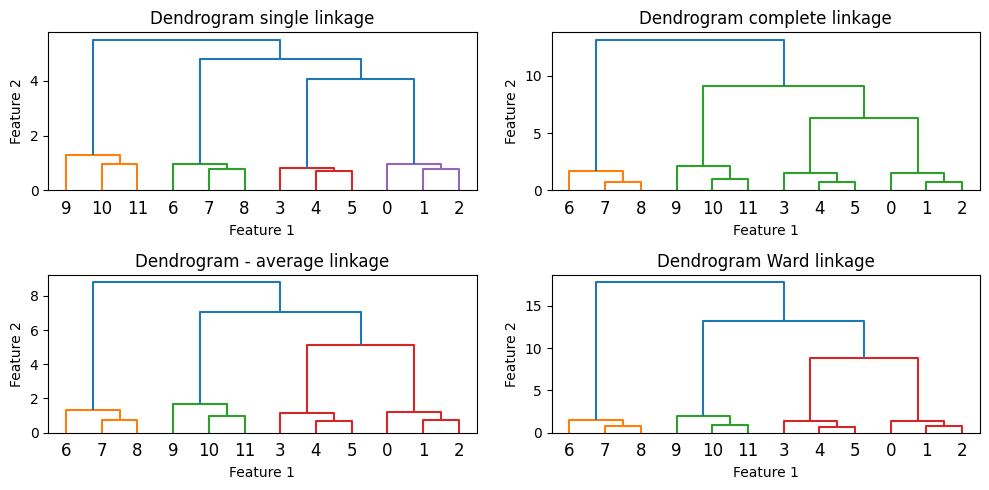

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10, 5))

linkage_single = linkage(X_for_hierarchi, method='single')
linkage_complete = linkage(X_for_hierarchi, method='complete')
linkage_average = linkage(X_for_hierarchi, method='average')
linkage_ward = linkage(X_for_hierarchi, method='ward')

plt.subplot(2, 2, 1)
dendrogram(linkage_single)
plt.title('Dendrogram single linkage')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(2, 2, 2)
dendrogram(linkage_complete)
plt.title('Dendrogram complete linkage')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(2, 2, 4)
dendrogram(linkage_ward)
plt.title('Dendrogram Ward linkage')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(2, 2, 3)
dendrogram(linkage_average)
plt.title('Dendrogram - average linkage')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


plt.tight_layout()
plt.show()

### For evaluation usage

Silhouette_score -  Measures how similar a point is to its own cluster compared to other clusters; ranges from -1 not similar to +1 similar.

Calinski_harabasz_score - Evaluates cluster separation and compactness higher is better.

Davies_bouldin_score - Computes average similarity between clusters, lower is better.

In [19]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

sil_single = silhouette_score(X_for_hierarchi, agg_single_labels)
sil_complete = silhouette_score(X_for_hierarchi, agg_comp_labels)
sil_average = silhouette_score(X_for_hierarchi, agg_labels_avg)
sil_ward = silhouette_score(X_for_hierarchi, labels_ward)

print("Silhouette Score, Higher is Better")
print(f"Single: {sil_single:.3f}")
print(f"Complete:{sil_complete:.3f}")
print(f"Average: {sil_average:.3f}")
print(f"Ward: {sil_ward:.3f}")

ch_single = calinski_harabasz_score(X_for_hierarchi, agg_single_labels)
ch_complete = calinski_harabasz_score(X_for_hierarchi, agg_comp_labels)
ch_average = calinski_harabasz_score(X_for_hierarchi, agg_labels_avg)
ch_ward = calinski_harabasz_score(X_for_hierarchi, labels_ward)

print("Calinski-Harabasz Score Higher is Better")
print(f"Single: {ch_single:.3f}")
print(f"Complete:{sil_complete:.3f}")
print(f"Average: {ch_average:.3f}")
print(f"Ward: {ch_ward:.3f}")

db_single = davies_bouldin_score(X_for_hierarchi, agg_single_labels)
db_complete = davies_bouldin_score(X_for_hierarchi, agg_comp_labels)
db_average = davies_bouldin_score(X_for_hierarchi, agg_labels_avg)
db_ward = davies_bouldin_score(X_for_hierarchi,  labels_ward)

print("Davies-Bouldin Index Lower is Better")
print(f"Single: {db_single:.3f}")
print(f"Complete:{db_complete:.3f}")
print(f"Average: {db_average:.3f}")
print(f"Ward: {db_ward:.3f}")

Silhouette Score, Higher is Better
Single: 0.627
Complete:0.627
Average: 0.627
Ward: 0.627
Calinski-Harabasz Score Higher is Better
Single: 24.293
Complete:0.627
Average: 24.293
Ward: 24.293
Davies-Bouldin Index Lower is Better
Single: 0.500
Complete:0.500
Average: 0.500
Ward: 0.500


#### Choosing the Best K for KMeans using different scoring algorithms like Silhouette_score or Calinski_harabasz_score or Davies_bouldin_score

In [20]:
# Find best K using K-means and silhouette_score, calinski_harabasz_score, davies_bouldin_score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Create sample data with clear clusters
np.random.seed(42)
X = np.vstack([
    np.random.randn(100, 2) * 0.5 + [0, 0],
    np.random.randn(100, 2) * 0.5 + [3, 3],
    np.random.randn(100, 2) * 0.5 + [0, 3],
])

X = StandardScaler().fit_transform(X)

sil_best_k, sil_best_score = None, -1
cal_best_k, cal_best_score = None, -1
db_best_k, db_best_score = None, 1

for k in range(2, 11):
    labels = KMeans(n_clusters=k, random_state=42).fit_predict(X)
    sil_score = silhouette_score(X, labels, metric='euclidean')
    cal_score = calinski_harabasz_score(X, labels)
    db_score = davies_bouldin_score(X, labels)
    if sil_score > sil_best_score:
        sil_best_k, sil_best_score = k, sil_score
    if cal_score > cal_best_score:
        cal_best_k, cal_best_score = k, cal_score
    if db_score < db_best_score:
        db_best_k, db_best_score = k, db_score


print(f"Best k = {sil_best_k}  by silhouette score {sil_best_score:.3f}")
print(f"Best k = {cal_best_k} by best calinski_harabasz_score {cal_best_score:.3f}")
print(f"Best k = {db_best_k}  by davies_bouldin_score {db_best_score:.3f}")

Best k = 3  by silhouette score 0.701
Best k = 3 by best calinski_harabasz_score 1309.757
Best k = 3  by davies_bouldin_score 0.407


#### Ploting Cluster for Best K cluster and its centroids identified using KMeans

Centroids recommended by KMeans for k=3 is [[ 1.34307513  0.70436352]
 [-0.68245233 -1.33676043]
 [-0.6606228   0.63239691]]


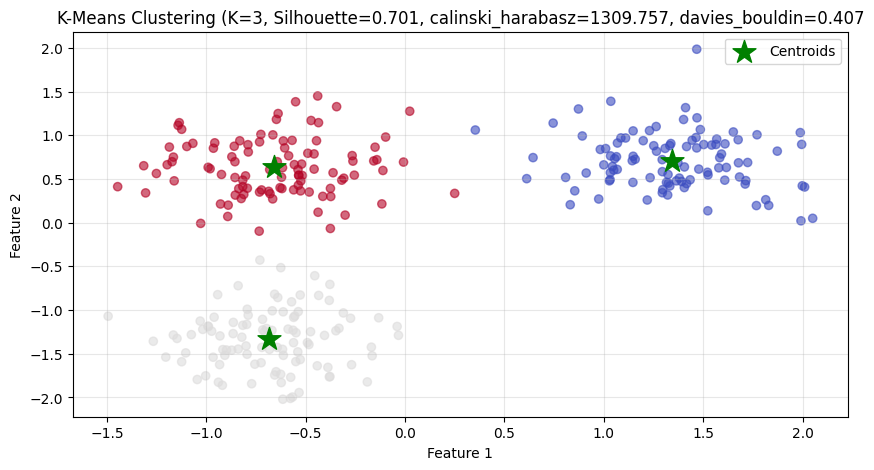

In [21]:
kmeans = KMeans(n_clusters=sil_best_k, n_init='auto', random_state=42)
labels = kmeans.fit_predict(X)
print(f"Centroids recommended by KMeans for k={sil_best_k} is {kmeans.cluster_centers_}")

plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
           c='green', marker='*', s=300, edgecolor='green', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'K-Means Clustering (K={sil_best_k}, Silhouette={sil_best_score:.3f}, calinski_harabasz={cal_best_score:.3f}, davies_bouldin={db_best_score:.3f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#### Elbow method

Plot clustering cost vs K, elbow represent diminishing returns

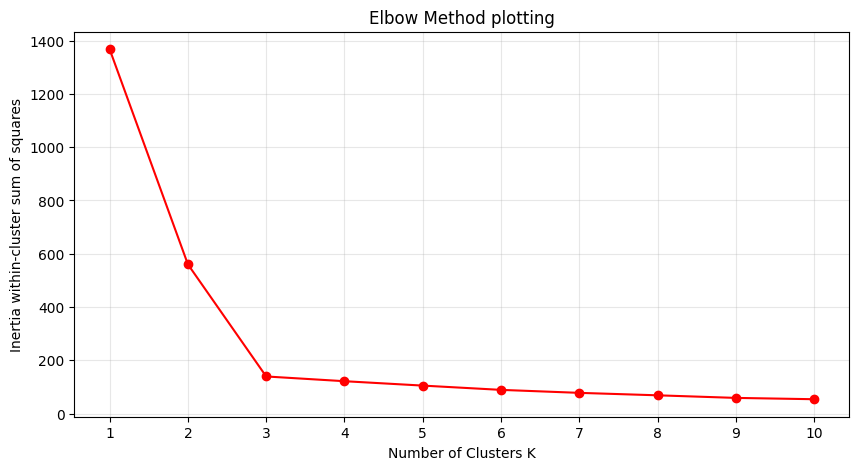

Inertias: [1368.1629703668318, 560.0928555426628, 139.10029166096032, 121.29574125280116, 104.80874100410222, 88.74028612155594, 77.5278091568443, 68.31053103492886, 58.586922537411525, 53.62716579972544]


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

np.random.seed(42)
X = np.vstack([
    np.random.randn(100, 2) * 0.5 + [0, 0],
    np.random.randn(100, 2) * 0.5 + [3, 3],
    np.random.randn(100, 2) * 0.5 + [0, 3],
])

K_range = range(1, 11)
inertias = []

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(K_range, inertias, 'ro-')
plt.xlabel('Number of Clusters K')
plt.ylabel('Inertia within-cluster sum of squares')
plt.title('Elbow Method plotting')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)
plt.show()

print("Inertias:", inertias)

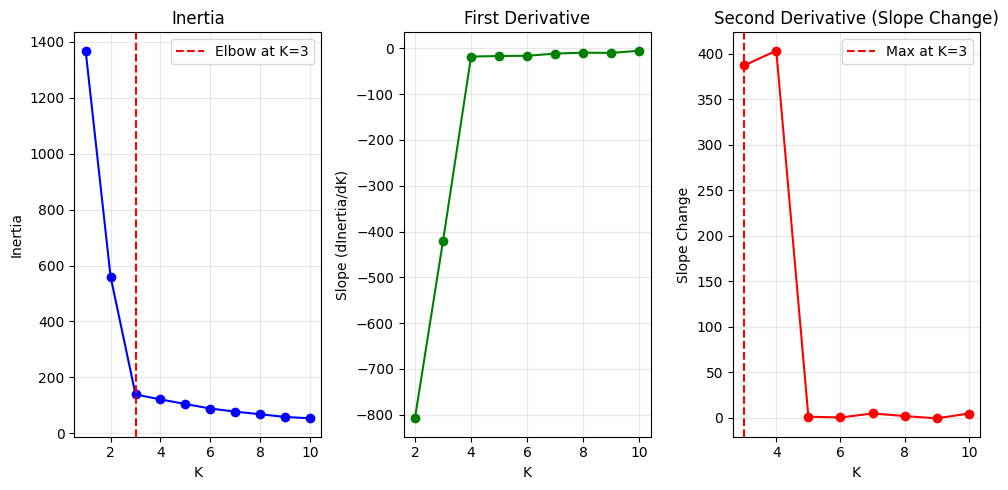

Optimal K (slope change): 3


In [23]:
#Automatically detect elbow by finding maximum slope change.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate data
np.random.seed(42)
X = np.vstack([
    np.random.randn(100, 2) * 0.5 + [0, 0],
    np.random.randn(100, 2) * 0.5 + [3, 3],
    np.random.randn(100, 2) * 0.5 + [0, 3],
])

# Calculate inertia for different K
K_range = range(1, 11)
inertias = []

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    
def find_elbow_slope_change(K_range, inertias):
   
     # Calculate first derivative (slope)
    slopes = np.diff(inertias)
    
    # Calculate second derivative (slope change)
    slope_changes = np.diff(slopes)
    
    # Find maximum slope change
    elbow_idx = np.argmax(slope_changes) + 1  # +1 because of diff
    elbow_K = K_range[elbow_idx]
    
    return elbow_K, slopes, slope_changes

# Find elbow
elbow_K, slopes, slope_changes = find_elbow_slope_change(K_range, inertias)

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# Inertia
axes[0].plot(K_range, inertias, 'bo-')
axes[0].axvline(x=elbow_K, color='r', linestyle='--', label=f'Elbow at K={elbow_K}')
axes[0].set_xlabel('K')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Inertia')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# First derivative
axes[1].plot(K_range[1:], slopes, 'go-')
axes[1].set_xlabel('K')
axes[1].set_ylabel('Slope (dInertia/dK)')
axes[1].set_title('First Derivative')
axes[1].grid(True, alpha=0.3)

# Second derivative
axes[2].plot(K_range[2:], slope_changes, 'ro-')
axes[2].axvline(x=elbow_K, color='r', linestyle='--', label=f'Max at K={elbow_K}')
axes[2].set_xlabel('K')
axes[2].set_ylabel('Slope Change')
axes[2].set_title('Second Derivative (Slope Change)')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Optimal K (slope change): {elbow_K}")


# Part 2: Solution Exploration for MNIST Test Dataset

### Solution plan

#### Using MNIST test Data

#### Preprocessing ideas:

- StandardScaler - to reduce magnitude bias.
- Choosing n_components based on cummulative explained variance.

#### Choosing optimal values:

- K-Means: Best K from Elbow, Silhouette, Davies–Bouldin, Calinski–Harabasz plots.
- DBSCAN: Optimal eps and min_pt from Knee plot
- Hierarchical: for balanced dendograms using Ward method

#### Evaluation metrics:

- Silhouette, Davies–Bouldin, Calinski–Harabasz.
- NMI and ARI scores


In [24]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# input
mnist = fetch_openml("mnist_784", version=1)
X = mnist.data
y = mnist.target.astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=10000, stratify=y, random_state=0
)

# Convert to numpy arrays
X_test = X_test.values
y_test = y_test.values

print(f"shape: {X_test.shape}")
print("Sample[0] length:", len(X_test[0]))


shape: (10000, 784)
Sample[0] length: 784


#### Fetched the Test Data from MNIST based on the code sample provided for the assignment

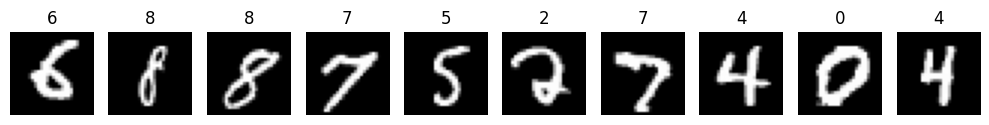

In [25]:
# view data
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 10, figsize=(10, 5))
axes = axes.ravel()

for i in range(10):
    idx = np.random.randint(0, len(X_test))
    axes[i].imshow(X_test[idx].reshape(28, 28), cmap='gray')
    axes[i].set_title(f'{y_test[idx]}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

##### Visualized the Test Data

Printing the MNIST Test Data samples with Lables for visulization of the data used for experiment

### Preprocessing

##### 1. Normalisation and Scaling
##### 2. PCA - Plotting Explained variance graph to find optimal n_components value


In [26]:
from sklearn.preprocessing import StandardScaler
X_normalized = X_test/255.0 
X_scaled = StandardScaler().fit_transform(X_normalized)

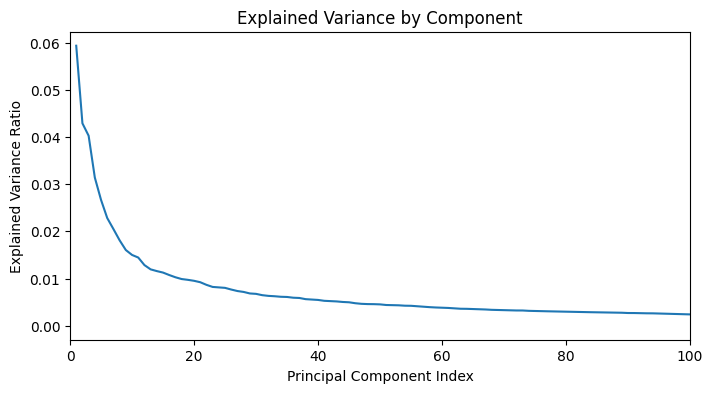

In [27]:
# Plotting PCA for all components with explained_variance_ratio_ to determine n_comp value

pca_all_comp=PCA(n_components=None, random_state=0)
pca_all_comp.fit(X_scaled)

plt.figure(figsize=(8,4))

plt.plot(range(1,len(pca_all_comp.explained_variance_ratio_) + 1),pca_all_comp.explained_variance_ratio_,linestyle='-')
plt.title('Explained Variance by Component')
plt.xlabel('Principal Component Index') 
plt.ylabel('Explained Variance Ratio') 
plt.xlim(0, 100) # focus on the first 200 components where the elbow usually appears 
plt.show()

In [28]:
#As elbow is around 15, considering 15 components

n_components = 15
pca = PCA(n_components=n_components, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"PCA transformed shape: {X_pca.shape}")


PCA transformed shape: (10000, 15)


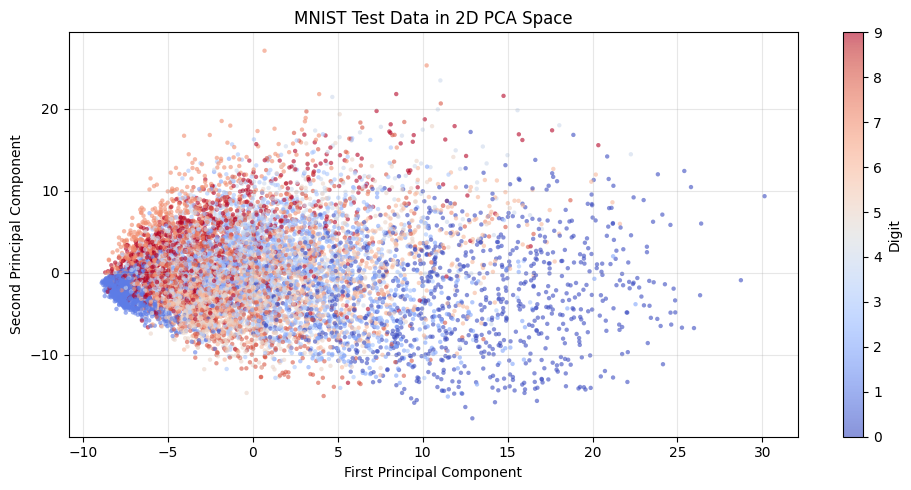

In [29]:
# Using first 2 components for visualization

X_2d = X_pca[:, :2]

plt.figure(figsize=(10, 5))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_test, cmap='coolwarm', 
                     alpha=0.6, s=10, edgecolors='none')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('MNIST Test Data in 2D PCA Space')
plt.colorbar(scatter, label='Digit', ticks=range(10))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Clustering Algorithm 1: K-Means

Determine Optimal K

Using multiple methods to find the optimal number of clusters:

1. Elbow method (Inertia)
2. Silhouette score
3. Davies-Bouldin index
4. Calinski-Harabasz index

In [30]:
# Test different K values using K-Means
K_range = range(2, 30)

# List for storing metrics
kmeans_metrics = {
    'inertia': [],
    'silhouette': [],
    'davies_bouldin': [],
    'calinski_harabasz': []
}

for K in K_range:
   
    # Fit K-Means
    kmeans = KMeans(n_clusters=K, random_state=42, n_init=10, max_iter=100)
    labels = kmeans.fit_predict(X_pca)
    
    # Store metrics
    kmeans_metrics['inertia'].append(kmeans.inertia_)
    kmeans_metrics['silhouette'].append(silhouette_score(X_pca, labels))
    kmeans_metrics['davies_bouldin'].append(davies_bouldin_score(X_pca, labels))
    kmeans_metrics['calinski_harabasz'].append(calinski_harabasz_score(X_pca, labels))
    


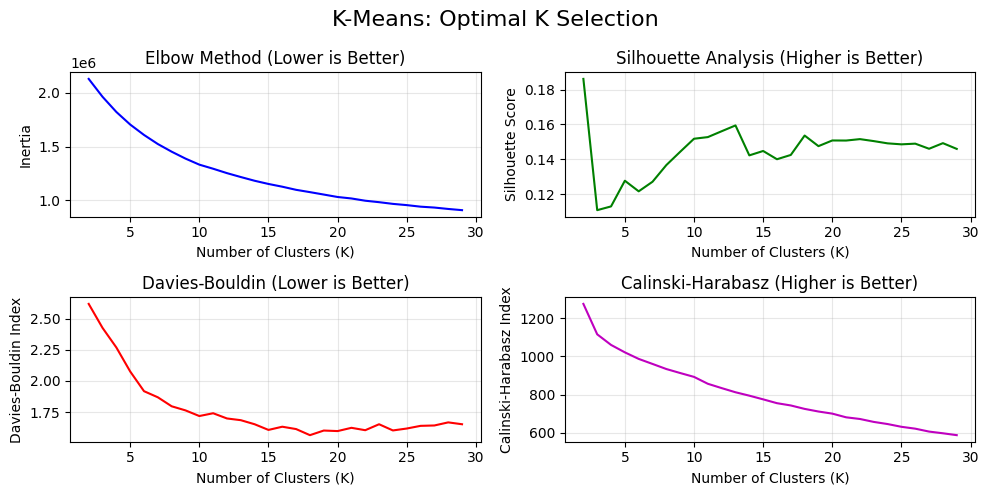

In [36]:
# Plot all metrics
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

axes[0, 0].plot(K_range, kmeans_metrics['inertia'], 'b-')
axes[0, 0].set_xlabel('Number of Clusters (K)')
axes[0, 0].set_ylabel('Inertia')
axes[0, 0].set_title('Elbow Method (Lower is Better)')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(K_range, kmeans_metrics['silhouette'], 'g-')
axes[0, 1].set_xlabel('Number of Clusters (K)')
axes[0, 1].set_ylabel('Silhouette Score')
axes[0, 1].set_title('Silhouette Analysis (Higher is Better)')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].plot(K_range, kmeans_metrics['davies_bouldin'], 'r-')
axes[1, 0].set_xlabel('Number of Clusters (K)')
axes[1, 0].set_ylabel('Davies-Bouldin Index')
axes[1, 0].set_title('Davies-Bouldin (Lower is Better)')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(K_range, kmeans_metrics['calinski_harabasz'], 'm-')
axes[1, 1].set_xlabel('Number of Clusters (K)')
axes[1, 1].set_ylabel('Calinski-Harabasz Index')
axes[1, 1].set_title('Calinski-Harabasz (Higher is Better)')
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('K-Means: Optimal K Selection', fontsize=16)
plt.tight_layout()
plt.show()


#### Projected the validation metrics to find optimal K value.

* Used Inertia for Elbow Method - No much inference as it is smooth
* Silhouette Score - To be considered as it gives sharp increase at 2 and 13(appx)
* Davies Bouldin Score 
* Calinski-Harabasz Score

To visually identify the K value from the ploting.

### Based on projected plots, K value is taken to be 13.

#### Calculate the Internal Metrics(Based on predicted labels) to compare the algorithms

- Silhouette score
- Davies bouldin Score
- Calinski harabasz

#### Calculate the External Metrics(Based on actual labels)

- Adjusted Random Score
- Normalized Mutual Info

#### Calculate all these metrics on K-Means, K-Medoids, DBSCAN, AgglomerativeClustering using n_components 15(for PCA) and K value 13

In [ ]:
#For K Means: 
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
K_optimal= 13
kmeans_final = KMeans(n_clusters=K_optimal,random_state=42,n_init=20, max_iter=300)
kmeans_labels = kmeans_final.fit_predict(X_pca)

# Scores

kmeans_silhouette= silhouette_score(X_pca, kmeans_labels)
kmeans_db= davies_bouldin_score(X_pca, kmeans_labels)
kmeans_ch= calinski_harabasz_score(X_pca, kmeans_labels)
kmeans_ari= adjusted_rand_score(y_test, kmeans_labels)
kmeans_nmi= normalized_mutual_info_score(y_test, kmeans_labels)


NameError: name 'Counter' is not defined

#### Completed K-Means validation score calculation

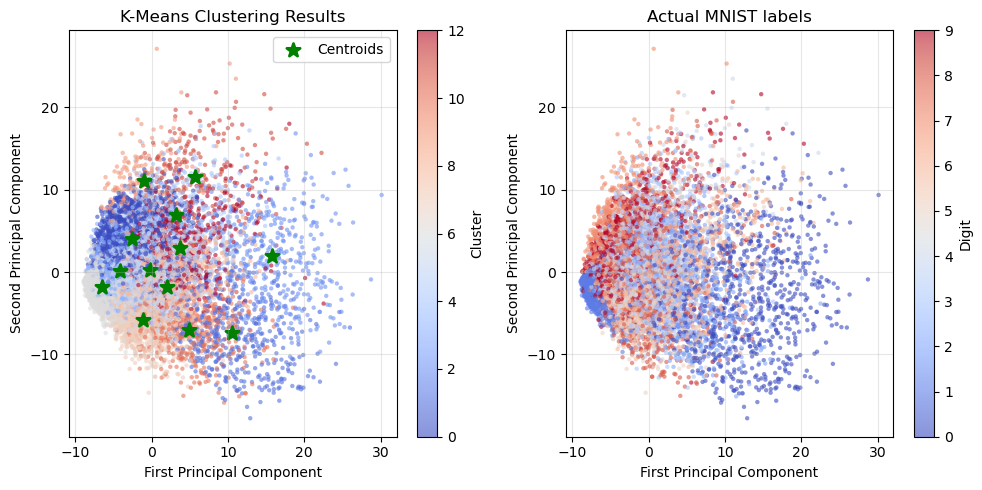

In [ ]:
#Comparing K-Means labels against Actual MNIST Labels for quick comparision

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#Plotting k means labels for 2 components

scatter1 = axes[0].scatter(X_2d[:, 0], X_2d[:, 1], c=kmeans_labels, 
                          cmap='coolwarm', alpha=0.6, s=10, edgecolors='none')
axes[0].scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1],
               c='green', marker='*', s=100, edgecolors='green', linewidths=2, label='Centroids')

axes[0].set_xlabel('First Principal Component')
axes[0].set_ylabel('Second Principal Component')
axes[0].set_title('K-Means Clustering Results')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Cluster')


#Plotting actual labels for 2 components

scatter2 = axes[1].scatter(X_2d[:, 0], X_2d[:, 1], c=y_test,cmap='coolwarm', alpha=0.6, s=10, edgecolors='none')
axes[1].set_xlabel('First Principal Component')
axes[1].set_ylabel('Second Principal Component')
axes[1].set_title('Actual MNIST labels')
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Digit', ticks=range(10))

plt.tight_layout()
plt.show()

#### Plotted K-Means Clustering vs Actual MNIST for visualization

In [39]:
# Find K-medoids
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import (
    silhouette_score, davies_bouldin_score, calinski_harabasz_score,
    adjusted_rand_score, normalized_mutual_info_score
)
from collections import Counter

kmedoids = KMedoids(n_clusters=K_optimal, random_state=42, max_iter=100)
kmedoids_labels = kmedoids.fit_predict(X_pca)

kmedoids_silhouette = silhouette_score(X_pca, kmedoids_labels)
kmedoids_db = davies_bouldin_score(X_pca, kmedoids_labels)
kmedoids_ch = calinski_harabasz_score(X_pca, kmedoids_labels)
kmedoids_ari = adjusted_rand_score(y_test, kmedoids_labels)
kmedoids_nmi = normalized_mutual_info_score(y_test, kmedoids_labels)


#### Completed K-Medoids validation score calculation

#### Finding eps and min_samples using knee method

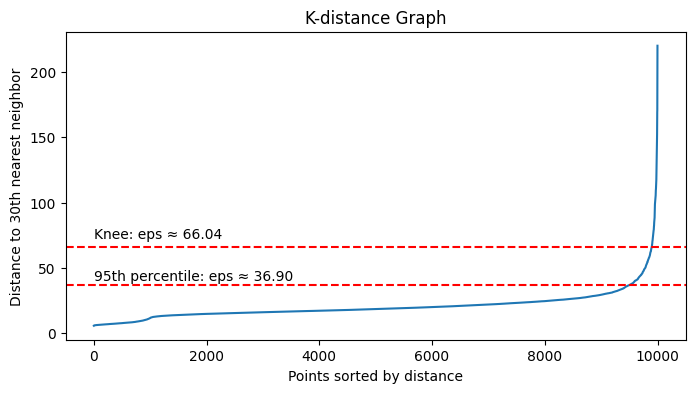

In [42]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator


# Calculate distances to k nearest neighbors with k = 2*dim(best practice)

k = 2 * X_pca.shape[1]
neighbor = NearestNeighbors(n_neighbors=k)
neighbor.fit(X_scaled)
distances, _ = neighbor.kneighbors(X_scaled)

# Sort and plot k-distance graph
k_distances = np.sort(distances[:, -1])
plt.figure(figsize=(8, 4))
plt.plot(range(len(k_distances)), k_distances)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'Distance to {k}th nearest neighbor')
plt.title('K-distance Graph')

percentile_95 = np.percentile(k_distances, 95)

# finding knee point
knee_locator = KneeLocator(range(len(k_distances)), k_distances, 
                          curve='convex', direction='increasing')
knee_value = k_distances[knee_locator.knee]

# plotting knee point and 95th percentile to find best eps

plt.axhline(y=knee_value, color='r', linestyle='--')
plt.text(0, knee_value*1.1, f'Knee: eps ≈ {knee_value:.2f}')
plt.axhline(y=percentile_95, color='r', linestyle='--')
plt.text(0, percentile_95*1.1, f'95th percentile: eps ≈ {percentile_95:.2f}')
plt.show()

# Identified parameters

optimal_eps = knee_value
min_samples = k 


##### Executed DBSCAN using eps value of 66 from knee plot, but clustering was not effective
##### Executed DBSCAN using eps value of 36 at 95th percentile, even then, clustering was not effective

##### Hence validated DBSCAN using eps value of 36 from 95th percentile with min_sample as 30 (based on best practice -> 2* dim)


In [43]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

optimal_eps = 36
min_samples = 30

print(f"\nUsing eps={optimal_eps}, min_samples={min_samples}")

# Final DBSCAN clustering
dbscan_final = DBSCAN(eps=optimal_eps, min_samples=min_samples)
dbscan_labels = dbscan_final.fit_predict(X_pca)
print(X_pca.shape)

n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_dbscan = list(dbscan_labels).count(-1)

mask_valid = dbscan_labels != -1
if mask_valid.sum() > n_clusters_dbscan and n_clusters_dbscan > 1:
    dbscan_silhouette = silhouette_score(X_pca[mask_valid], dbscan_labels[mask_valid])
    dbscan_db = davies_bouldin_score(X_pca[mask_valid], dbscan_labels[mask_valid])
    dbscan_ch = calinski_harabasz_score(X_pca[mask_valid], dbscan_labels[mask_valid])
    dbscan_ari = adjusted_rand_score(y_test[mask_valid], dbscan_labels[mask_valid])
    dbscan_nmi = normalized_mutual_info_score(y_test[mask_valid], dbscan_labels[mask_valid])
else:
    dbscan_silhouette = dbscan_db = dbscan_ch = dbscan_ari = dbscan_nmi = 0.0

print("\nDBSCAN Results:")
print(f"  Number of clusters: {n_clusters_dbscan}")
print(f"  Number of noise points: {n_noise_dbscan} ({n_noise_dbscan/len(dbscan_labels)*100:.1f}%)")
print(f"  Silhouette Score: {dbscan_silhouette:.3f}")
print(f"  Davies-Bouldin Index: {dbscan_db:.3f}")
print(f"  Calinski-Harabasz Index: {dbscan_ch:.0f}")
print(f"\nCluster sizes: {Counter(dbscan_labels)}")



Using eps=36, min_samples=30
(10000, 15)

DBSCAN Results:
  Number of clusters: 1
  Number of noise points: 1 (0.0%)
  Silhouette Score: 0.000
  Davies-Bouldin Index: 0.000
  Calinski-Harabasz Index: 0

Cluster sizes: Counter({np.int64(0): 9999, np.int64(-1): 1})


#### Completed DBSCAN validation using optimal values

#### Inference : Results failed with zero values, suggesting grouping all points into one single cluster.Hence not efficient for this dataset.

In [44]:
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering with Ward linkage

hierarchical = AgglomerativeClustering(n_clusters=K_optimal, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_pca)

hierarchical_silhouette = silhouette_score(X_pca, hierarchical_labels)
hierarchical_db = davies_bouldin_score(X_pca, hierarchical_labels)
hierarchical_ch = calinski_harabasz_score(X_pca, hierarchical_labels)
hierarchical_ari = adjusted_rand_score(y_test, hierarchical_labels)
hierarchical_nmi = normalized_mutual_info_score(y_test, hierarchical_labels)

### Completed Hierarchical Clustering bottom up alorithm validation

In [45]:
print("Comparison of Results fo the Algorithm K-Means, K-Medoids, DBSCAN, nHierarchical")

print("Various scores to compare")

print("\nK-Means results:")
print(f"  Inertia: {kmeans_final.inertia_:.2f}")
print(f"  Silhouette Score: {kmeans_silhouette:.3f}")
print(f"  Davies-Bouldin Index: {kmeans_db:.3f}")
print(f"  Calinski-Harabasz Index: {kmeans_ch:.3f}")


print("\nK-Medoids Results:")
print(f"  Inertia: {kmedoids.inertia_:.2f}")
print(f"  Silhouette Score: {kmedoids_silhouette:.3f}")
print(f"  Davies-Bouldin Index: {kmedoids_db:.3f}")
print(f"  Calinski-Harabasz Index: {kmedoids_ch:.3f}")
print(f"\nCluster sizes: {Counter(kmedoids_labels)}")

print("\nDBSCAN Results:")
print(f"  Number of clusters: {n_clusters_dbscan}")
print(f"  Number of noise points: {n_noise_dbscan} ({n_noise_dbscan/len(dbscan_labels)*100:.1f}%)")
print(f"  Silhouette Score: {dbscan_silhouette:.3f}")
print(f"  Davies-Bouldin Index: {dbscan_db:.3f}")
print(f"  Calinski-Harabasz Index: {dbscan_ch:.3f}")
print(f"\nCluster sizes: {Counter(dbscan_labels)}")

print("\nHierarchical Clustering Results:")
print(f"  Silhouette Score: {hierarchical_silhouette:.3f}")
print(f"  Davies-Bouldin Index: {hierarchical_db:.3f}")
print(f"  Calinski-Harabasz Index: {hierarchical_ch:.3f}")
print(f"\nCluster sizes: {Counter(hierarchical_labels)}")


Comparison of Results fo the Algorithm K-Means, K-Medoids, DBSCAN, nHierarchical
Various scores to compare

K-Means results:
  Inertia: 1216300.02
  Silhouette Score: 0.159
  Davies-Bouldin Index: 1.685
  Calinski-Harabasz Index: 812.243

K-Medoids Results:
  Inertia: 116900.43
  Silhouette Score: 0.063
  Davies-Bouldin Index: 2.259
  Calinski-Harabasz Index: 534.729

Cluster sizes: Counter({np.int64(5): 1145, np.int64(8): 1051, np.int64(2): 963, np.int64(0): 949, np.int64(7): 833, np.int64(3): 828, np.int64(11): 812, np.int64(4): 755, np.int64(6): 677, np.int64(9): 639, np.int64(12): 465, np.int64(1): 455, np.int64(10): 428})

DBSCAN Results:
  Number of clusters: 1
  Number of noise points: 1 (0.0%)
  Silhouette Score: 0.000
  Davies-Bouldin Index: 0.000
  Calinski-Harabasz Index: 0.000

Cluster sizes: Counter({np.int64(0): 9999, np.int64(-1): 1})

Hierarchical Clustering Results:
  Silhouette Score: 0.106
  Davies-Bouldin Index: 1.908
  Calinski-Harabasz Index: 627.239

Cluster size

#### Compared all 4 algorithms(Using unsupervised validation methods), 

- Calculated validation metrics for effective comparison of the inferred labels
- Able to view and understand how different algorthims clustered the dataset
  

In [46]:
# To find efficient algorithm for our MNIST test dataset

print("Comparison of Results fo the Algorithm K-Means, K-Medoids, DBSCAN, nHierarchical")

print("ARI, NMI comparision for all 4 algorithms")

print("\nK-Means results:")
print(f"\n  Adjusted Rand Index: {kmeans_ari:.3f}")
print(f"  Normalized Mutual Info: {kmeans_nmi:.3f}")


print("\nK-Medoids Results:")
print(f"\n  Adjusted Rand Index: {kmedoids_ari:.3f}")
print(f"  Normalized Mutual Info: {kmedoids_nmi:.3f}")

print("\nDBSCAN Results:")
print(f"\n  Adjusted Rand Index: {dbscan_ari:.3f}")
print(f"  Normalized Mutual Info: {dbscan_nmi:.3f}")

print("\nHierarchical Clustering Results:")
print(f"\n  Adjusted Rand Index: {hierarchical_ari:.3f}")
print(f"  Normalized Mutual Info: {hierarchical_nmi:.3f}")

Comparison of Results fo the Algorithm K-Means, K-Medoids, DBSCAN, nHierarchical
ARI, NMI comparision for all 4 algorithms

K-Means results:

  Adjusted Rand Index: 0.339
  Normalized Mutual Info: 0.471

K-Medoids Results:

  Adjusted Rand Index: 0.273
  Normalized Mutual Info: 0.379

DBSCAN Results:

  Adjusted Rand Index: 0.000
  Normalized Mutual Info: 0.000

Hierarchical Clustering Results:

  Adjusted Rand Index: 0.408
  Normalized Mutual Info: 0.543


## Conclusion

### Comparison of Results for the Algorithm K-Means, K-Medoids, DBSCAN, Hierarchical

#### Normalized Mutual Information (NMI)
- Score range: 0 to 1 and 1 = perfect correlation.
#### Adjusted Rand Index (ARI)
- Score range: −1 to 1, Higher = better agreement.

ARI, NMI comparision for all 4 algorithms

K-Means results:

  Adjusted Rand Index: 0.339
  Normalized Mutual Info: 0.471

K-Medoids Results:

  Adjusted Rand Index: 0.273
  Normalized Mutual Info: 0.379

DBSCAN Results:

  Adjusted Rand Index: 0.000
  Normalized Mutual Info: 0.000

Hierarchical Clustering Results:

  Adjusted Rand Index: 0.408
  Normalized Mutual Info: 0.543

#### Inference:
  
 - For the MNIST Test Data Sets with **K value as 13** and **15 Principal components** out of 784 Features,
   the result inclines more towards **Hierarchical Clustering** as best choice of algorithm for the data in hand, where **ARI is 0.408** and **NMI is 0.543** compared to other algorithms.

- Hierarchical Clustering has marginal edge over K-Means and K-Medoids when compared with actual label.
- Scores of K-Means and K-Medoids justifies the correctness of Hierarchical Clustering as they are consistently closer.